## CS/CE 457/464 Homework 10

## Owais Aijaz 7610
## oa07610@st.habib.edu.pk

In [1]:
!pip install nltk
!pip install spacy
!pip install bs4
!pip install requests
!pip install re
!pip install numpy
!pip install os
!pip install pandas

ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re
ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [3]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# Question 01: NER

Fetching article from: https://www.dawn.com/news/1873159/aqi-level-in-lahore-plummets-to-297-after-change-in-wind-direction

Named Entities Found:

                     Entity     Label
0                    Punjab   PRODUCT
1                       AQI       ORG
2                    Lahore       GPE
3                       297  CARDINAL
4                      11pm      TIME
5                    Sunday      DATE
6                    Multan       GPE
7                       230  CARDINAL
8                       Met       ORG
9                    Punjab      NORP
10       Marriyum Aurangzeb    PERSON
11                  Chakwal       ORG
12            the other day      DATE
13             Detox Punjab   PRODUCT
14               Rawalpindi    PERSON
15                   Lahore    PERSON
16              at least 50  CARDINAL
17                   Punjab   PRODUCT
18             Jan 31, 2025      DATE
19                      two  CARDINAL
20                       35  CARDINAL
21              

None


Entity Distribution...


<ipython-input-7-f4f014aa5a14>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Label', data=label_counts, palette='viridis')


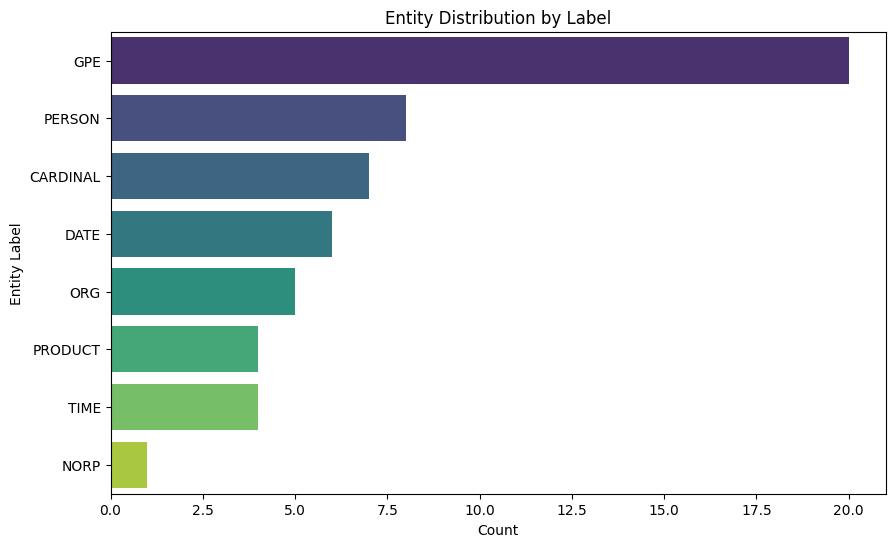


--- Analysis of Findings ---

Entity Counts by Label:

Label
GPE         20
PERSON       8
CARDINAL     7
DATE         6
ORG          5
PRODUCT      4
TIME         4
NORP         1
Name: count, dtype: int64


In [7]:
import requests
from bs4 import BeautifulSoup
import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to fetch and extract article text from a URL
def fetch_article_text(url):
    try:
        # Send a GET request to the URL
        response = requests.get(url)
        response.raise_for_status()  # Raise exception for HTTP errors

        # Parse the HTML content using BeautifulSoup
        soup = BeautifulSoup(response.text, 'html.parser')

        # Remove scripts and styles
        for script_or_style in soup(['script', 'style']):
            script_or_style.decompose()

        # Extract text from <p> tags, which usually contain the article content
        paragraphs = soup.find_all('p')
        article_text = '\n'.join([para.get_text() for para in paragraphs])

        # Clean the text
        article_text = re.sub(r'\s+', ' ', article_text)  # Replace multiple spaces with single space
        return article_text

    except requests.exceptions.RequestException as e:
        print(f"Error fetching the article: {e}")
        return None

# Function to perform NER using spaCy
def perform_ner(text, model='en_core_web_sm'):
    # Load the spaCy model
    nlp = spacy.load(model)

    # Process the text
    doc = nlp(text)

    # Extract entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return doc, entities

# Function to visualize entities using displaCy
def visualize_entities(doc, url=None, output_path=None):
    # If running in Jupyter, use 'jupyter' renderer
    # Otherwise, render to a file
    try:
        from IPython.display import display
        display(displacy.render(doc, style="ent", jupyter=True, options={'compact': True}))
    except ImportError:
        # Not in Jupyter, render to a file
        displacy.render(doc, style="ent", page=True, minify=True, options={'compact': True}, outfile=output_path)
        print(f"Entity visualization saved to {output_path}")

# Function to visualize entity distribution
def plot_entity_distribution(entities):
    # Create a DataFrame
    df = pd.DataFrame(entities, columns=['Entity', 'Label'])

    # Count entities by label
    label_counts = df['Label'].value_counts().reset_index()
    label_counts.columns = ['Label', 'Count']

    # Plot using seaborn
    plt.figure(figsize=(10,6))
    sns.barplot(x='Count', y='Label', data=label_counts, palette='viridis')
    plt.title('Entity Distribution by Label')
    plt.xlabel('Count')
    plt.ylabel('Entity Label')
    plt.show()

# Main function to execute the workflow
def main():
    # Example URL of an article
    url = "https://www.dawn.com/news/1873159/aqi-level-in-lahore-plummets-to-297-after-change-in-wind-direction"

    print(f"Fetching article from: {url}\n")
    text = fetch_article_text(url)

    if text:
        # Perform NER
        doc, entities = perform_ner(text)

        # Display entities
        df_entities = pd.DataFrame(entities, columns=['Entity', 'Label'])
        print("Named Entities Found:\n")
        print(df_entities)

        # Visualize entities
        visualize_entities(doc)

        # Plot entity distribution
        print("\nEntity Distribution...")
        plot_entity_distribution(entities)

        # Analyze findings
        analyze_findings(doc, entities)

    else:
        print("Failed to retrieve article text.")

# Function to analyze findings and discuss shortcomings
def analyze_findings(doc, entities):
    print("\n--- Analysis of Findings ---\n")
    # Display entity counts
    df = pd.DataFrame(entities, columns=['Entity', 'Label'])
    print("Entity Counts by Label:\n")
    print(df['Label'].value_counts())

# Execute the main function
if __name__ == "__main__":
    main()

### Shortcomings and Errors in NER Output:

*   Punjab was incorrectly labeled as PRODUCT instead of GPE or NORP.
Cities like "Rawalpindi", "Lahore", "Sialkot", and "Faisalabad" were mislabeled as PERSON instead of GPE.
*   "AQI" (Air Quality Index) was wrongly classified as ORG instead of QUANTITY or MEASURE.
"Chakwal" and "Jhelum" were labeled as ORG instead of GPE.
The phrase "Designed for Dawn" incorrectly tagged "Dawn" as PERSON rather than ORG.
*  "Smog" was incorrectly identified as PERSON instead of EVENT or left untagged. "Flights" were mislabeled as PERSON instead of EVENT or NO ENTITY.
*  "Detox Punjab" was categorized as PRODUCT when it appears to be a CAMPAIGN or EVENT.

# Question 02: Word Frequency and Keyword Extraction Analysis

### Preprocessing:

In [11]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32624 sha256=bf0fec9474b02073e095b79e4ff783210cd802d36baec940b386c3b06ca4b0b9
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [12]:
from tika import parser # pip install tika

raw = parser.from_file('paper-309.pdf')

2024-11-18 07:13:06,545 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2024-11-18 07:13:07,009 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-11-18 07:13:07,429 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...
2024-11-18 07:13:12,443 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [13]:
text = raw['content']
print(text)








































Team Sharingans at SimpleText: Fine-Tuned LLM based approach to Scientific Text Simplification


Team Sharingans at SimpleText: Fine-Tuned LLM based
approach to Scientific Text Simplification
Syed Muhammad Ali1,*, Hammad Sajid1, Owais Aijaz1, Owais Waheed1, Faisal Alvi1 and
Abdul Samad1

1Computer Science Program, Dhanani School of Science and Engineering, Habib University, Karachi-75290, Pakistan.

Abstract
This paper reports Habib University’s Team Sharingans’ participation in the CLEF 2024 SimpleText track, which
aims to simplify scientific texts for improved readability and comprehension for non-experts. Our goal is to use
state-of-the-art language models for simple yet accurate explanations of scientific texts for the general public.
Our solution is based on a multi-step approach utilizing the GPT-3.5 model to solve Tasks 1, 2, and 3 i.e. passage
extraction, identification and explanation of difficult concepts, and summarization. Our approach

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')

# Load SpaCy's English model
nlp = spacy.load('en_core_web_sm')

# Preprocessing function
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Preprocess the text
processed_tokens = preprocess_text(text)
print("Processed Tokens:\n", processed_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Processed Tokens:
 ['team', 'sharingans', 'simpletext', 'llm', 'based', 'approach', 'scientific', 'text', 'simplification', 'team', 'sharingans', 'simpletext', 'llm', 'based', 'approach', 'scientific', 'text', 'simplification', 'syed', 'muhammad', 'ali1', 'hammad', 'sajid1', 'owais', 'aijaz1', 'owais', 'waheed1', 'faisal', 'alvi1', 'abdul', 'samad1', '1computer', 'science', 'program', 'dhanani', 'school', 'science', 'engineering', 'habib', 'university', 'pakistan', 'abstract', 'paper', 'reports', 'habib', 'university', 'team', 'sharingans', 'participation', 'clef', '2024', 'simpletext', 'track', 'aims', 'simplify', 'scientific', 'texts', 'improved', 'readability', 'comprehension', 'goal', 'use', 'language', 'models', 'simple', 'yet', 'accurate', 'explanations', 'scientific', 'texts', 'general', 'public', 'solution', 'based', 'approach', 'utilizing', 'model', 'solve', 'tasks', '1', '2', '3', 'passage', 'extraction', 'identification', 'explanation', 'difficult', 'concepts', 'summarizatio

## Word Frequency:

### Technique 1: Using NLTK

Most Common Words:
 [('task', 77), ('model', 69), ('approach', 27), ('text', 27), ('https', 27), ('2', 23), ('query', 21), ('3', 19), ('table', 19), ('1', 18), ('clef', 17), ('turbo', 17), ('data', 16), ('scores', 16), ('based', 15), ('scientific', 15), ('language', 15), ('abstracts', 15), ('used', 15), ('simpletext', 14), ('2024', 14), ('keywords', 13), ('definitions', 13), ('et', 13), ('models', 12), ('generate', 12), ('sentences', 12), ('utilized', 12), ('prompt', 11), ('relevant', 11)]


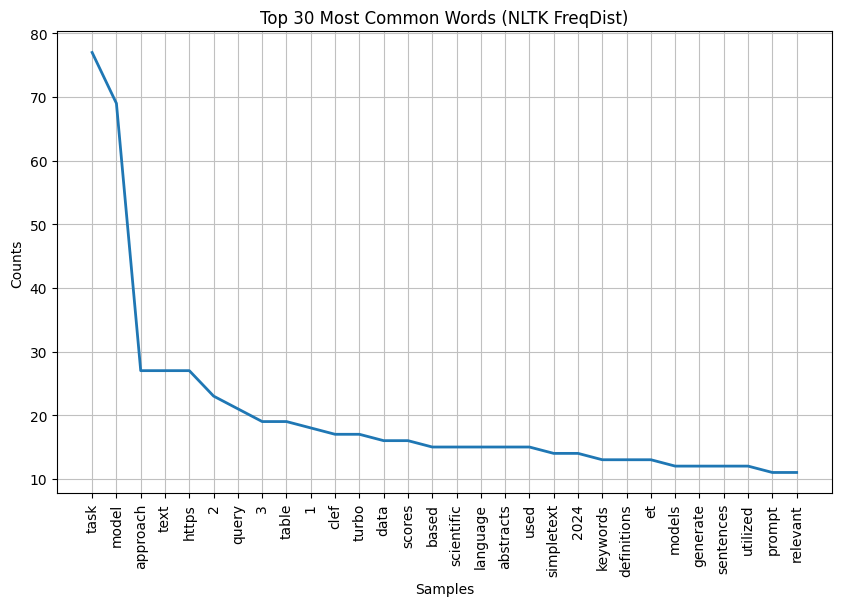

In [20]:
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate word frequency
freq_dist = FreqDist(processed_tokens)

# Display the most common words
print("Most Common Words:\n", freq_dist.most_common(30))

# Plot the frequency distribution
plt.figure(figsize=(10,6))
freq_dist.plot(30, title='Top 30 Most Common Words (NLTK FreqDist)')
plt.show()

### Technique 2: Using Collections' Counter

Most Common Words (Counter):
 [('task', 77), ('model', 69), ('approach', 27), ('text', 27), ('https', 27), ('2', 23), ('query', 21), ('3', 19), ('table', 19), ('1', 18), ('clef', 17), ('turbo', 17), ('data', 16), ('scores', 16), ('based', 15), ('scientific', 15), ('language', 15), ('abstracts', 15), ('used', 15), ('simpletext', 14)]


<ipython-input-33-8e20cd817d9b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=freq_df_counter, palette='Blues_d')


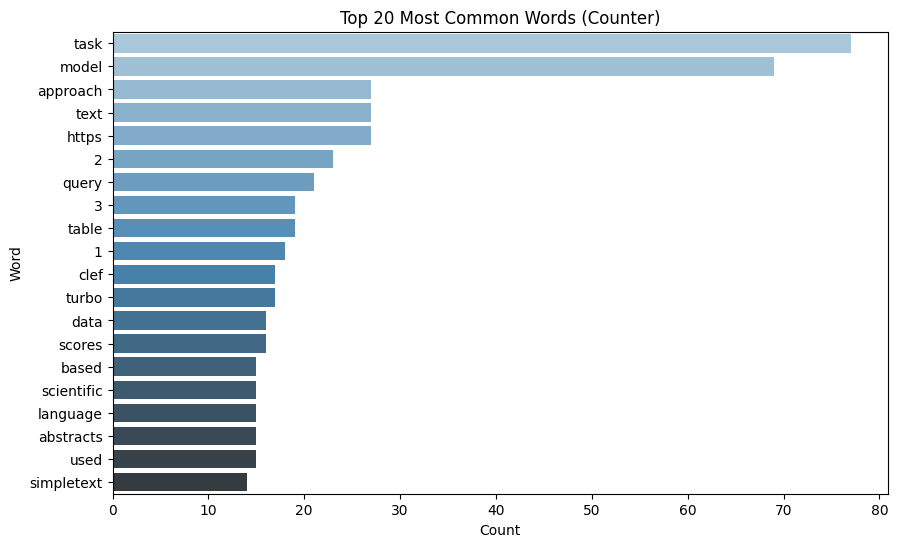

In [33]:
from collections import Counter
import seaborn as sns

# Calculate word frequency using Counter
counter = Counter(processed_tokens)

# Display the most common words
print("Most Common Words (Counter):\n", counter.most_common(20))

# Convert to dataframe for visualization
import pandas as pd
freq_df_counter = pd.DataFrame(counter.most_common(20), columns=['Word', 'Count'])

# Plot the frequency distribution
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Word', data=freq_df_counter, palette='Blues_d')
plt.title('Top 20 Most Common Words (Counter)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

### Technique 3: Using SpaCy

Processed Tokens (SpaCy):
 ['team', 'sharingan', 'simpletext', 'fine', 'tune', 'llm', 'base', 'approach', 'scientific', 'text', 'simplification', 'team', 'sharingan', 'simpletext', 'fine', 'tune', 'llm', 'base', 'approach', 'scientific', 'text', 'simplification', 'sye', 'muhammad', 'hammad', 'owais', 'owais', 'faisal', 'abdul', 'science', 'program', 'dhanani', 'school', 'science', 'engineering', 'habib', 'university', 'pakistan', 'abstract', 'paper', 'report', 'habib', 'university', 'team', 'sharingan', 'participation', 'clef', 'simpletext', 'track', 'aim', 'simplify', 'scientific', 'text', 'improved', 'readability', 'comprehension', 'non', 'expert', 'goal', 'use', 'state', 'art', 'language', 'model', 'simple', 'accurate', 'explanation', 'scientific', 'text', 'general', 'public', 'solution', 'base', 'multi', 'step', 'approach', 'utilize', 'model', 'solve', 'task', 'passage', 'extraction', 'identification', 'explanation', 'difficult', 'concept', 'summarization', 'approach', 'task', 'inv

<ipython-input-37-e733a60a9f07>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=freq_df_spacy, palette='Greens_d')


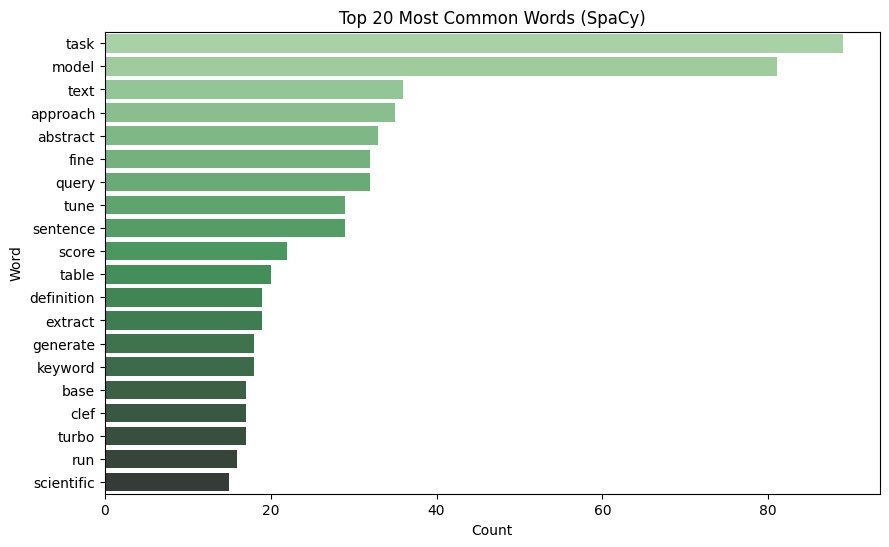

In [37]:
# Function to preprocess text using SpaCy
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return tokens

# Preprocess the text using SpaCy
processed_tokens_spacy = preprocess_text_spacy(text)
print("Processed Tokens (SpaCy):\n", processed_tokens_spacy)

# Calculate word frequency using Counter
counter_spacy = Counter(processed_tokens_spacy)

# Display the most common words
print("Most Common Words (SpaCy Counter):\n", counter_spacy.most_common(20))

# Convert to dataframe for visualization
freq_df_spacy = pd.DataFrame(counter_spacy.most_common(20), columns=['Word', 'Count'])

# Plot the frequency distribution
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y='Word', data=freq_df_spacy, palette='Greens_d')
plt.title('Top 20 Most Common Words (SpaCy)')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

### Observations:

Both NLTK's FreqDist and Collections' Counter produced identical top common words, prominently featuring terms like "task", "model", and "approach". However, they also included irrelevant tokens such as "https" and standalone numbers ("2", "3", "2024"), which may skew the analysis. In contrast, SpaCy's Tokenization showed higher frequencies for key terms like "task" and "model" and effectively normalized words through lemmatization (e.g., "abstracts" to "abstract"). This led to a more refined list but resulted in discrepancies, such as higher counts for certain words and the exclusion of some relevant terms found by NLTK and Counter. Additionally, SpaCy excluded standalone numbers, enhancing the relevance of the results.

## Keyword Extraction:

### Technique 1: Using KeyBERT



In [46]:
!pip install keybert

Top 20 Keywords (KeyBERT):
             Keyword   Score
0          textrank  0.4873
1     summarization  0.4400
2       summarizing  0.4377
3            corpus  0.4041
4        simpletext  0.3787
5             texts  0.3676
6           corpora  0.3413
7          keywords  0.3365
8         summaries  0.3350
9       readability  0.3346
10        sentences  0.3269
11  semanticscholar  0.3189
12       comprehend  0.3187
13             text  0.3157
14        abstracts  0.3081
15          phrases  0.3039
16            brief  0.2888
17           topics  0.2862
18   contextualized  0.2822
19      linguistics  0.2816


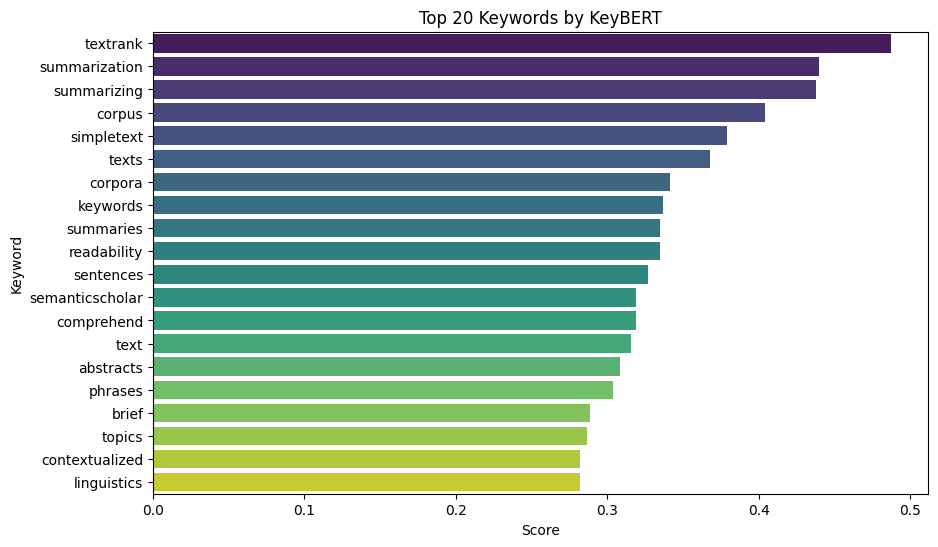

In [51]:
from keybert import KeyBERT

kw_model = KeyBERT()
text_rank_keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 1), stop_words='english', top_n=20)

# Convert to dataframe
textrank_df = pd.DataFrame(text_rank_keywords, columns=['Keyword', 'Score'])

# Display top 20 keywords
print("Top 20 Keywords (KeyBERT):\n", textrank_df.head(20))

# Plot the top 10 keywords
plt.figure(figsize=(10,6))
sns.barplot(x='Score', y='Keyword', data=textrank_df.head(20), palette='viridis')
plt.title('Top 20 Keywords by KeyBERT')
plt.xlabel('Score')
plt.ylabel('Keyword')
plt.show()

### Technique 2: Using TF-IDF with scikit-learn

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-30-a0937105a438>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Word', data=tfidf_df.head(20), palette='magma')


Top 20 Keywords (TF-IDF):
            Word  TF-IDF Score
776        task      9.968109
514       model      9.023076
293         eds      7.208005
375         gpt      6.935304
348        fine      5.335444
788        text      5.087242
623       query      4.369451
107   abstracts      4.342106
144    approach      4.323428
697   sentences      4.200985
250        data      3.386954
191        ceur      3.316564
823        used      3.257686
770       table      3.185286
809      tuning      3.146680
201        clef      3.104685
17           10      3.020021
448    keywords      3.002549
685  scientific      2.999413
364    generate      2.986504


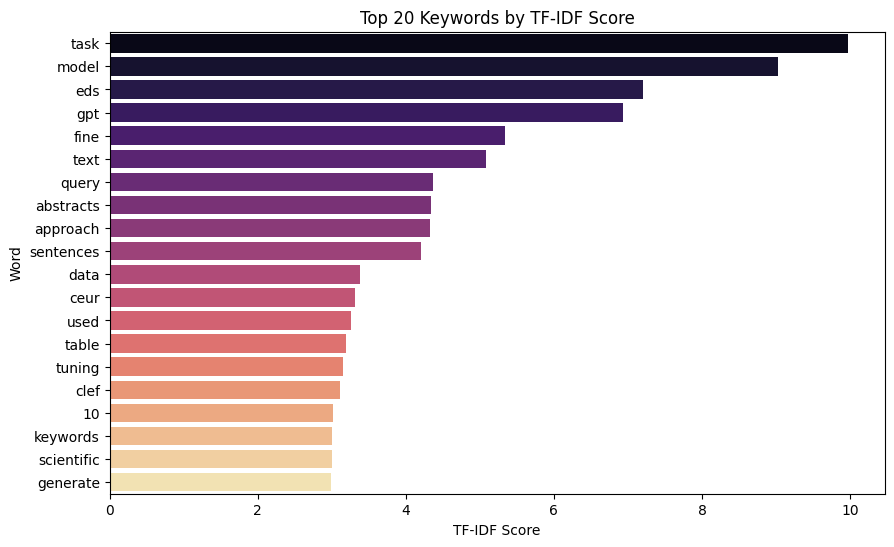

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Since TF-IDF requires documents, we'll treat each sentence as a separate document
from nltk.tokenize import sent_tokenize

# Download necessary NLTK data
nltk.download('punkt')

# Tokenize the original text into sentences
sentences = sent_tokenize(text.lower())

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the sentences
tfidf_matrix = vectorizer.fit_transform(sentences)

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Calculate TF-IDF scores
tfidf_scores = tfidf_matrix.sum(axis=0).A1

# Create a dataframe of words and their TF-IDF scores
tfidf_df = pd.DataFrame({'Word': feature_names, 'TF-IDF Score': tfidf_scores})

# Sort the dataframe by TF-IDF scores in descending order
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Display top 10 keywords
print("Top 20 Keywords (TF-IDF):\n", tfidf_df.head(20))

# Plot the top 10 keywords
plt.figure(figsize=(10,6))
sns.barplot(x='TF-IDF Score', y='Word', data=tfidf_df.head(20), palette='magma')
plt.title('Top 20 Keywords by TF-IDF Score')
plt.xlabel('TF-IDF Score')
plt.ylabel('Word')
plt.show()

### Technique 3: Using RAKE

In [26]:
pip install python-rake

Top 10 Keywords (RAKE):
                                              Keyword      Score
0              use\nstate-of-the-art language models  37.314286
1        denoising sequence-to-sequence pre-training  32.519481
2  corpus=title&phrase=digital assistant&length=1...  31.957123
4    4 fine-tuned pegasus sequence-to-sequence model  31.197025
3      fine-tuned pegasus sequence-to-sequence model  31.197025
5         fine-tuned bart sequence-to-sequence model  30.808136
6       3 fine-tuned bart sequence-to-sequence model  30.808136
7  pre-trained\nencoder-decoder model tailored sp...  28.251282
8                 sequence-\nto-sequence model using  23.688187
9    perpetuate gender stereotypes&length=100\nhttps  22.585415


<ipython-input-29-3d96ec7ade30>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Keyword', data=rake_df.head(10), palette='coolwarm')


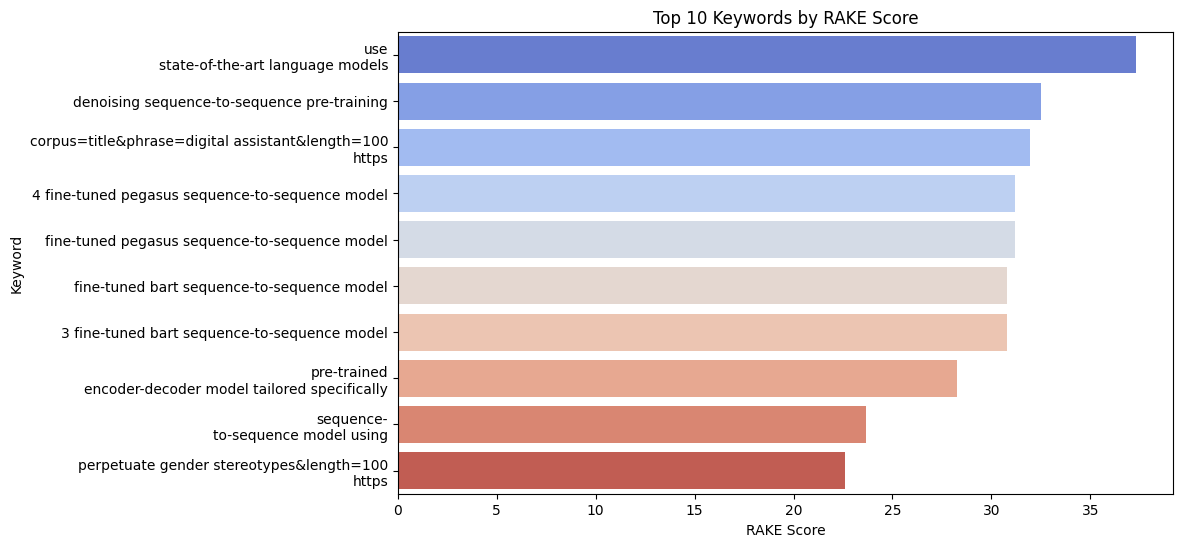

In [29]:
import RAKE
import operator

# Initialize RAKE by providing a set of stopwords
rake_object = RAKE.Rake(stopwords.words('english'))

# Extract keywords
keywords = rake_object.run(text)

# Convert keywords to a dataframe
rake_df = pd.DataFrame(keywords, columns=['Keyword', 'Score'])

# Sort by score in descending order
rake_df = rake_df.sort_values(by='Score', ascending=False)

# Display top 10 keywords
print("Top 10 Keywords (RAKE):\n", rake_df.head(10))

# Plot the top 10 keywords
plt.figure(figsize=(10,6))
sns.barplot(x='Score', y='Keyword', data=rake_df.head(10), palette='coolwarm')
plt.title('Top 10 Keywords by RAKE Score')
plt.xlabel('RAKE Score')
plt.ylabel('Keyword')
plt.show()

### Observations:

While KeyBERT and TF-IDF effectively identified important keywords reflecting the document's main topics, RAKE struggled with preprocessing artifacts, leading to less coherent keyword outputs. KeyBERT excels in capturing semantic-rich multi-word phrases, whereas TF-IDF focuses on term importance based on frequency. RAKE, though powerful in extracting multi-word phrases, requires robust preprocessing to avoid including irrelevant or fragmented terms.

# Question 03: Sentiment Analysis

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Total Tweets Analyzed: 20
Positive Sentiments: 13
Negative Sentiments: 6
Neutral Sentiments: 1


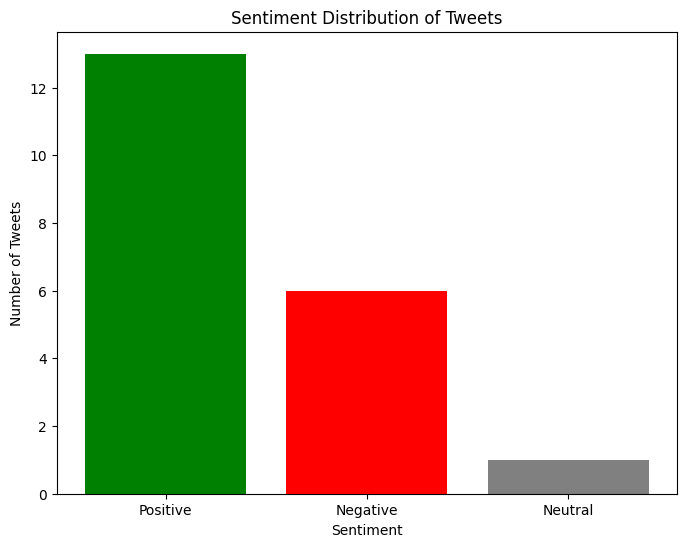


--- Example of Positive Sentiment ---
Tweet: 🌟 Thrilled to announce my upcoming world tour! Can't wait to see all your beautiful faces and share new music with you. 💖✨ #TaylorSwift #NewMusic
Sentiment: Positive
Scores: {'neg': 0.0, 'neu': 0.693, 'pos': 0.307, 'compound': 0.8516}

--- Example of Negative Sentiment ---
Tweet: Disappointed with the response to my latest single. Still believe in its message and hope it resonates with more people. 😔🎧 #MusicMatters
Sentiment: Negative
Scores: {'neg': 0.119, 'neu': 0.769, 'pos': 0.112, 'compound': -0.0516}


In [2]:
# Import necessary libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Read the text file line by line
def read_tweets(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()
    # Remove any trailing newline characters
    tweets = [tweet.strip() for tweet in tweets]
    return tweets

# Perform Sentiment Analysis and count positive and negative sentiments
def analyze_sentiments(tweets):
    positive = 0
    negative = 0
    neutral = 0
    sentiment_results = []

    for tweet in tweets:
        score = sia.polarity_scores(tweet)
        compound = score['compound']
        if compound >= 0.05:
            sentiment = 'Positive'
            positive += 1
        elif compound <= -0.05:
            sentiment = 'Negative'
            negative += 1
        else:
            sentiment = 'Neutral'
            neutral += 1
        sentiment_results.append({'Tweet': tweet, 'Sentiment': sentiment, 'Score': score})

    return sentiment_results, positive, negative, neutral

# Display one Positive and one Negative sentiment tweet
def display_examples(sentiment_results):
    positive_tweet = None
    negative_tweet = None

    for result in sentiment_results:
        if result['Sentiment'] == 'Positive' and not positive_tweet:
            positive_tweet = result
        elif result['Sentiment'] == 'Negative' and not negative_tweet:
            negative_tweet = result
        if positive_tweet and negative_tweet:
            break

    print("\n--- Example of Positive Sentiment ---")
    print(f"Tweet: {positive_tweet['Tweet']}")
    print(f"Sentiment: {positive_tweet['Sentiment']}")
    print(f"Scores: {positive_tweet['Score']}")

    print("\n--- Example of Negative Sentiment ---")
    print(f"Tweet: {negative_tweet['Tweet']}")
    print(f"Sentiment: {negative_tweet['Sentiment']}")
    print(f"Scores: {negative_tweet['Score']}")

# Main execution
def main():
    file_path = 'tweets.txt'
    tweets = read_tweets(file_path)
    sentiment_results, positive, negative, neutral = analyze_sentiments(tweets)

    print(f"Total Tweets Analyzed: {len(tweets)}")
    print(f"Positive Sentiments: {positive}")
    print(f"Negative Sentiments: {negative}")
    print(f"Neutral Sentiments: {neutral}")

    # Optionally, visualize the sentiment distribution
    sentiments = ['Positive', 'Negative', 'Neutral']
    counts = [positive, negative, neutral]

    plt.figure(figsize=(8,6))
    colors = ['green', 'red', 'grey']
    plt.bar(sentiments, counts, color=colors)
    plt.title('Sentiment Distribution of Tweets')
    plt.xlabel('Sentiment')
    plt.ylabel('Number of Tweets')
    plt.show()

    # Display example tweets
    display_examples(sentiment_results)

# Execute the main function
if __name__ == "__main__":
    main()

### Discussion:

The positive tweet accurately reflects excitement and gratitude, which the algorithm correctly identified as Positive.
The negative tweet conveys frustration and disappointment, which the algorithm correctly classified as Negative.
Overall, the sentiment analyzer appears to be accurate in distinguishing between positive and negative sentiments in these examples. VADER is known for its effectiveness in social media contexts, handling emojis and informal language well, which likely contributed to its accuracy in this analysis.

# Question 04: Recommendation Engines:

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import numpy as np

# Load dataset
df = pd.read_csv('imdb_top_1000.csv')

# Preprocessing for both TF-IDF and Doc2Vec
descriptions = df['Overview'].apply(str).tolist()

# Utility function to display recommendations
def display_recommendations(df, indices):
    print("\nRecommended Movies:")
    for idx in indices:
        print(f"{df.loc[idx, 'Series_Title']} - {df.loc[idx, 'Genre']}")


### TF-IDF Method:

In [6]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(descriptions)

# Function to get TF-IDF-based recommendations
def recommend_tfidf(movie_idx, top_n=3):
    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix[movie_idx], tfidf_matrix).flatten()
    # Get indices of top N similar movies (excluding itself)
    similar_indices = cosine_sim.argsort()[-(top_n+1):-1][::-1]
    display_recommendations(df, similar_indices)

TF-IDF Recommendations for 'The Godfather':

Recommended Movies:
Knives Out - Comedy, Crime, Drama
The Godfather: Part III - Crime, Drama
Nebraska - Adventure, Comedy, Drama


### Word2vec Model:

In [7]:
from gensim.utils import simple_preprocess

# Tagging documents for Doc2Vec
tagged_data = [TaggedDocument(simple_preprocess(desc), [i]) for i, desc in enumerate(descriptions)]

# Train Doc2Vec model
doc2vec_model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, epochs=40)

# Function to get Doc2Vec-based recommendations
def recommend_doc2vec(movie_idx, top_n=3):
    # Infer vector for the given movie description
    inferred_vector = doc2vec_model.infer_vector(simple_preprocess(descriptions[movie_idx]))
    # Compute similarity with all documents
    similarities = doc2vec_model.dv.most_similar([inferred_vector], topn=top_n)
    similar_indices = [sim[0] for sim in similarities]
    display_recommendations(df, similar_indices)

# Test Doc2Vec recommendations
print("\nDoc2Vec Recommendations for 'The Godfather':")
recommend_doc2vec(1)


Doc2Vec Recommendations for 'The Godfather':

Recommended Movies:
Fear and Loathing in Las Vegas - Adventure, Comedy, Drama
Eskiya - Crime, Drama, Thriller
The Godfather - Crime, Drama


In [13]:
# Test TF-IDF recommendations
print("TF-IDF Recommendations for 'The Godfather':")
recommend_tfidf(1)

print("\nTF-IDF Recommendations for 'Interstellar':")
recommend_tfidf(21)

# Test Doc2Vec recommendations
print("\nDoc2Vec Recommendations for 'The Godfather':")
recommend_doc2vec(1)

print("\nDoc2Vec Recommendations for 'Interstellar':")
recommend_doc2vec(21)

TF-IDF Recommendations for 'The Godfather':

Recommended Movies:
Knives Out - Comedy, Crime, Drama
The Godfather: Part III - Crime, Drama
Nebraska - Adventure, Comedy, Drama

TF-IDF Recommendations for 'Interstellar':

Recommended Movies:
Gattaca - Drama, Sci-Fi, Thriller
The Revenant - Action, Adventure, Drama
The Avengers - Action, Adventure, Sci-Fi

Doc2Vec Recommendations for 'The Godfather':

Recommended Movies:
Drishyam - Crime, Drama, Thriller
The Machinist - Drama, Thriller
I, Daniel Blake - Drama

Doc2Vec Recommendations for 'Interstellar':

Recommended Movies:
The Untouchables - Crime, Drama, Thriller
To Be or Not to Be - Comedy, War
Argo - Biography, Drama, Thriller


### Observations:

The TF-IDF Method seems to captures text similarity (e.g., shared words) well. While the word2vec model captures semantic similarity more effectively. I personally find the TF-IDF recommendations more accurate but the word2vec model recommendations are interesting as well. It gives related genres as well while the TF-IDF sticks to the almost the same genres.